<a href="https://colab.research.google.com/github/fereshteh-bahadory/NewProject/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
import os
import pathlib
from matplotlib import pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
Image_height=256
Image_width=256
Image_channel=3

seed =20
seed = np.random.seed

Reading the images from drive.

In [4]:
directory = pathlib.Path('/content')
X = np.full((25,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      #print(type(image_name))
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        image = cv2.imread(path+"/"+image_name,3)
        #iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        #image = Image.fromarray(image)
        image=np.array(image)
        X[k]=image

Reading labels from drive

In [5]:
directory = pathlib.Path('/content')
y_lb=np.full((25,256,256),0)
lb_name=[]
v=0
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      if image_name.endswith(".png"):
        lb_name.append(image_name)
        lb_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'train_labels':
    labels = os.listdir(path)
    for i, image_name in enumerate(labels):
      v=v+1
      if image_name.endswith(".png"):
        str_lb=str(image_name)
        l = lb_name.index(image_name)       
        label = cv2.imread(path+"/"+image_name,cv2.IMREAD_GRAYSCALE)
        #label = scaler.fit_transform(label.reshape(-1, label.shape[-1])).reshape(label.shape)
        #label = Image.fromarray(label)
        label=np.array(label)
        #label = to_categorical(label)
        y_lb[l]=label

Convertong labels to have binary values.

In [6]:
y_1 = np.full((25,256,256),0)
y = np.full((25,256,256,1),0)
matrix = np.full((25,256,256),0)
pmat = np.full((25,65536),0)
for i in range(0,25):
  mat = np.zeros(y_lb[i].size)
  mat2 = np.zeros(y_lb[i].size)
  flat_lb = y_lb[i].flatten()
  for j in range(0,y_lb[i].size):
    if flat_lb[j]>0.8:
      mat[j] = 1
    else:
      mat[j]=0
  mat2_2=mat2*255
  mat2_reshape = mat2_2.reshape(256,256)
  mat2_fin= np.expand_dims(mat2_reshape, axis = 2)
  pmat[i]=mat
  mat_reshape=mat.reshape(256,256)
  y[i]=mat2_fin
  matrix[i]=mat_reshape
for i in range(0,25):
  y[i]=np.expand_dims(matrix[i], axis = 2)

Randomly check if the images and labels match.

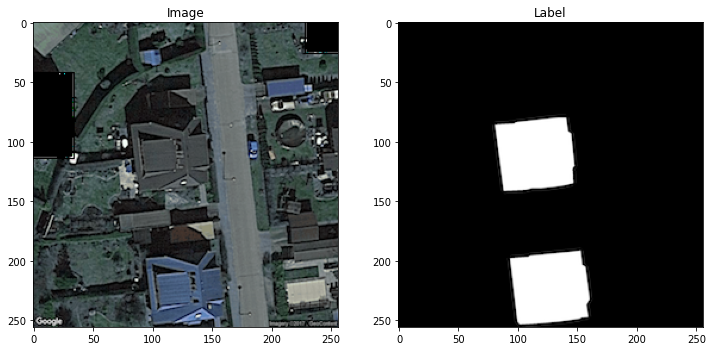

In [7]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(y_lb[t], cmap='gray')
plt.title('Label')
plt.show()

Randomly check if the images and the new labels match.

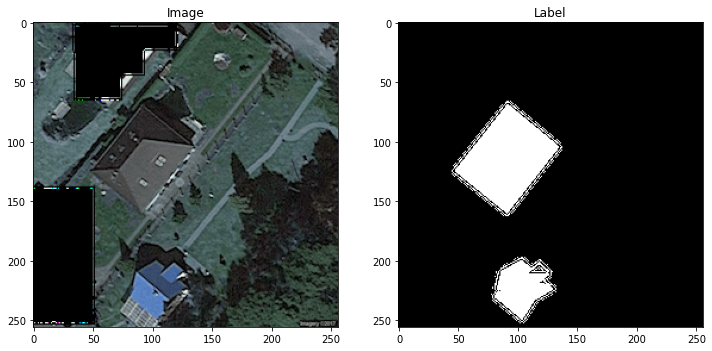

In [8]:
import random
t = random.randint(0,24)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(X[t])
plt.title('Image')
plt.subplot(122)
plt.imshow(matrix[t], cmap='gray')
plt.title('Label')
plt.show()

Defining our model

In [9]:
Inputs = layers.Input((Image_height,Image_width,Image_channel))
s = layers.Lambda(lambda x: x / 255)(Inputs)#to make everything float

#encoder layers
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)#drop some datas to prevent over fitting
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2, 2))(c5)

c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Dropout(0.1)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
p6 = tf.keras.layers.MaxPooling2D((2, 2))(c6)

c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p6)
c7 = tf.keras.layers.Dropout(0.1)(c7)
c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

#decoder layers
u8 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c6])
c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c5])
c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

u10 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c4])
c10 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Dropout(0.2)(c10)
c10 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

u11 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c3])
c11 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Dropout(0.2)(c11)
c11 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)

u12 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c11)
u12 = tf.keras.layers.concatenate([u12, c2])
c12 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u12)
c12 = tf.keras.layers.Dropout(0.2)(c12)
c12 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u12)

u13 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c12)
u13 = tf.keras.layers.concatenate([u13, c1])
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u13)
c13 = tf.keras.layers.Dropout(0.2)(c13)
c13 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u13)


outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c13)
 
model = tf.keras.Model(inputs=[Inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 8)  224         ['lambda[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 8)  0           ['conv2d[0][0]']             

Fit the model to images and labels.

In [10]:
results = model.fit(X, y, validation_split=0.04, batch_size=1, epochs=100)
mymodel=results.model

Epoch 1/100
24/24 [==============================] - 14s 463ms/step - loss: 0.6509 - accuracy: 0.7957 - val_loss: 0.5575 - val_accuracy: 0.8412
Epoch 2/100
24/24 [==============================] - 14s 582ms/step - loss: 0.5048 - accuracy: 0.8335 - val_loss: 0.4788 - val_accuracy: 0.8412
Epoch 3/100
24/24 [==============================] - 11s 482ms/step - loss: 0.4621 - accuracy: 0.8335 - val_loss: 0.4069 - val_accuracy: 0.8412
Epoch 4/100
24/24 [==============================] - 9s 385ms/step - loss: 0.4387 - accuracy: 0.8335 - val_loss: 0.3789 - val_accuracy: 0.8412
Epoch 5/100
24/24 [==============================] - 9s 384ms/step - loss: 0.4281 - accuracy: 0.8335 - val_loss: 0.3762 - val_accuracy: 0.8412
Epoch 6/100
24/24 [==============================] - 11s 465ms/step - loss: 0.4206 - accuracy: 0.8335 - val_loss: 0.3523 - val_accuracy: 0.8412
Epoch 7/100
24/24 [==============================] - 10s 436ms/step - loss: 0.4117 - accuracy: 0.8333 - val_loss: 0.3172 - val_accuracy: 0

Check the model with the train data.

In [11]:
l = random.randint(0, len(X))

predict_train_im = model.predict(X[:int(X.shape[0]*0.9)], verbose=1)
predict_train_lb = (predict_train_im > 0.4).astype(np.uint8)

1/1 [==============================] - 2s 2s/step


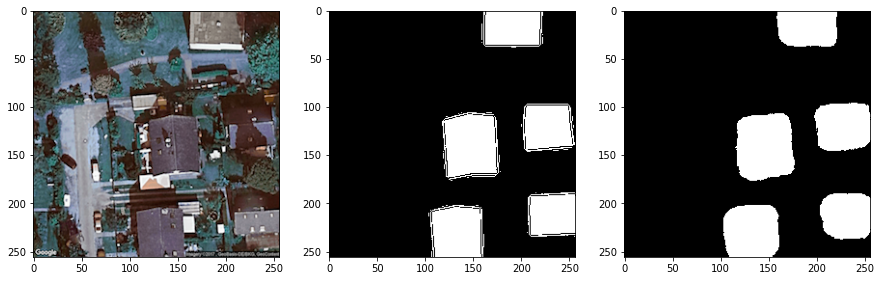

In [12]:
r = random.randint(0, len(predict_train_im))
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(X[r])
plt.subplot(1,3,2)
plt.imshow(np.squeeze(y[r]), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.squeeze(predict_train_lb[r]),cmap='gray')
plt.show()

Read the test data.

In [23]:
directory = pathlib.Path('/content')
X_test = np.full((5,256,256,3),0)
im_name=[]
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    images = os.listdir(path)
    for i, image_name in enumerate(images):
      if image_name.endswith(".png"):
        im_name.append(image_name)
        im_name.sort()
for path, subdirs, files in os.walk(directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'test_images':
    for i, image_name in enumerate(images):
      if image_name.endswith('.png'):
        str_name = str(image_name)
        k = im_name.index(str_name)
        test_im = cv2.imread(path+"/"+image_name,3)
        #iamge = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        #image = Image.fromarray(image)
        test_im=np.array(test_im)
        X_test[k]=test_im

See the result with the test data.

In [24]:
preds_test = model.predict(X_test, verbose=1)
preds_test_lb = (preds_test > 0.4).astype(np.uint8)

1/1 [==============================] - 0s 397ms/step


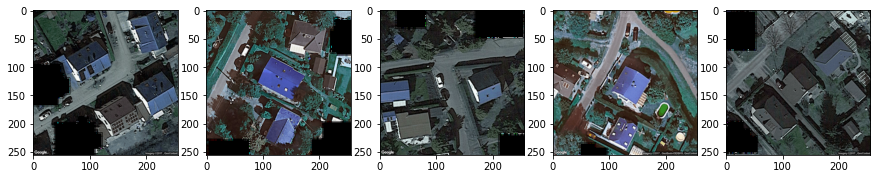

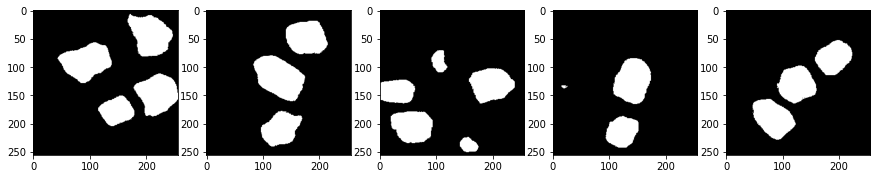

In [25]:
fig = plt.figure(figsize=(15,10))
for i in range(5):
  fig.add_subplot(1, 5, i+1)
  plt.imshow(X_test[i])

lfig = plt.figure(figsize=(15,10))
for j in range(5):
  lfig.add_subplot(1, 5, j+1)
  plt.imshow(np.squeeze(preds_test_lb[j]), cmap='gray')